Feature 0: 109.376205
Feature 1: 29.148503
Feature 2: 60.119876
Feature 3: 85.610645
Feature 4: 7.209750
Feature 5: 9.548212
Feature 6: 76.344560
Feature 7: 42.617200
Feature 8: 35.617658
Feature 9: 62.669604
Feature 10: 13.442577
Feature 11: 22.534458
Feature 12: 10.968729
Feature 13: 24.540035
Feature 14: 42.667828
Feature 15: 53.022030
Feature 16: 38.377387
Feature 17: 97.659654
Feature 18: 95.886158
Feature 19: 41.947234
Feature 20: 79.286941
Feature 21: 25.792333
Feature 22: 14.135534
Feature 23: 4.824786
Feature 24: 29.418884
Feature 25: 60.882560
Feature 26: 57.141975
Feature 27: 24.351696
Feature 28: 2.260091
Feature 29: 7.152206
Feature 30: 47.548806
Feature 31: 5.938136
Feature 32: 26.431431
Feature 33: 23.329498
Feature 34: 7.609414
Feature 35: 5.900581
Feature 36: 57.002812
Feature 37: 54.404530
Feature 38: 63.765747
Feature 39: 48.608152
Feature 40: 3.832940
Feature 41: 7.580070
Feature 42: 46.347200
Feature 43: 11.392669
Feature 44: 23.107295
Feature 45: 44.304916
Feature

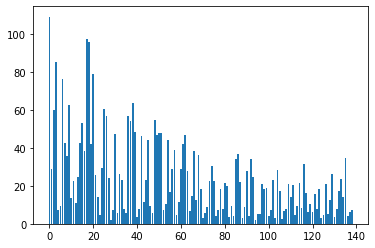

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('features_final.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature: 0, Score: 0.01584
Feature: 1, Score: 0.00511
Feature: 2, Score: 0.13143
Feature: 3, Score: 0.02792
Feature: 4, Score: 0.00505
Feature: 5, Score: 0.00417
Feature: 6, Score: 0.00498
Feature: 7, Score: 0.00610
Feature: 8, Score: 0.00760
Feature: 9, Score: 0.00536
Feature: 10, Score: 0.00314
Feature: 11, Score: 0.00659
Feature: 12, Score: 0.01833
Feature: 13, Score: 0.00592
Feature: 14, Score: 0.06838
Feature: 15, Score: 0.01078
Feature: 16, Score: 0.01044
Feature: 17, Score: 0.01378
Feature: 18, Score: 0.01338
Feature: 19, Score: 0.00303
Feature: 20, Score: 0.00668
Feature: 21, Score: 0.00221
Feature: 22, Score: 0.00409
Feature: 23, Score: 0.00424
Feature: 24, Score: 0.00379
Feature: 25, Score: 0.00425
Feature: 26, Score: 0.02598
Feature: 27, Score: 0.00201
Feature: 28, Score: 0.00156
Feature: 29, Score: 0.01025
Feature: 30, Score: 0.00932
Feature: 31, Score: 0.00235
Feature: 32, Score: 0.00282
Feature: 33, Score: 0.00879
Feature: 34, Score: 0.00606
Feature: 35, Score: 0.00663
Fe

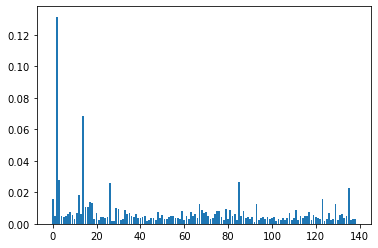

In [5]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X, y = load_dataset('features_final.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
0 2 3 67 93 123 129 135
36-39